In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
penguins = sns.load_dataset("penguins")
penguins = penguins.fillna(penguins.mean())
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


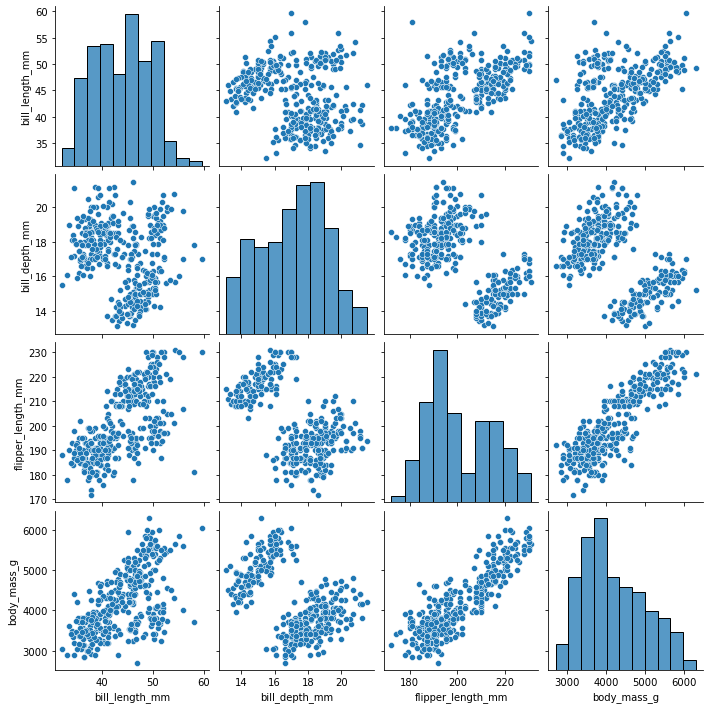

In [3]:
sns.pairplot(penguins)

In [4]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [5]:
penguins['cluster'] = km.predict(penguins[features])

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male,0
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female,0
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female,0
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN,0
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female,0


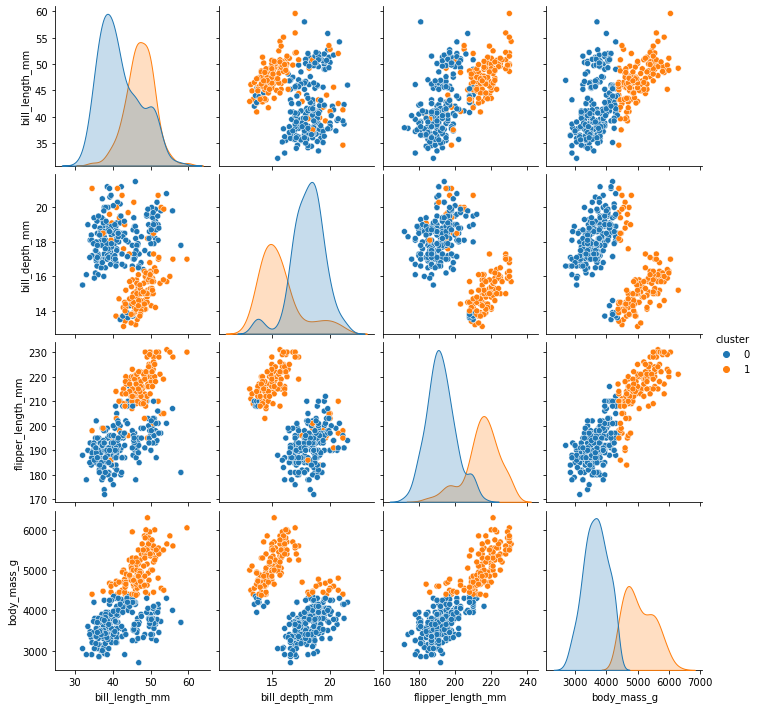

In [7]:
sns.pairplot(penguins, hue="cluster")

In [8]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [9]:
# You can change the features and n_clusters in the k-means above and check the impact on the Silhouette Coefficient
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6270788983241281

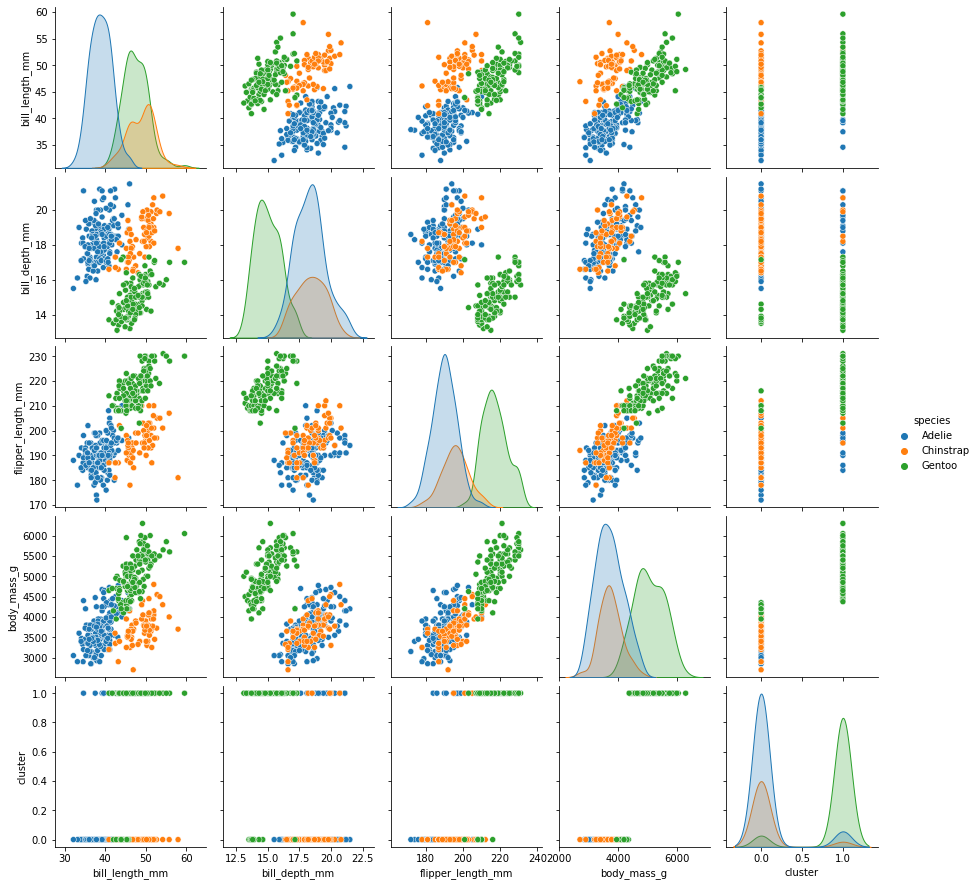

In [10]:
sns.pairplot(penguins, hue="species")

In [11]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,138,14
Chinstrap,63,5
Gentoo,10,114


<font color='blue'><b><i>It looks like the Adelie and Chinstrap species very often end up in the same clusters. The Gentoo species seems to be consistantly decently separeted from the other two species. When two species are roughly in the cluster, it means that there aren't too many statistically significant differences between the two species.